<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework 04: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project. Only 40 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would iterate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

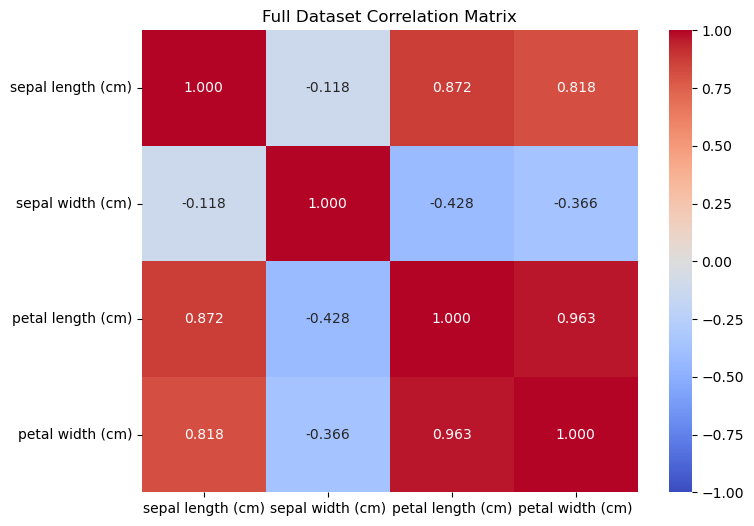

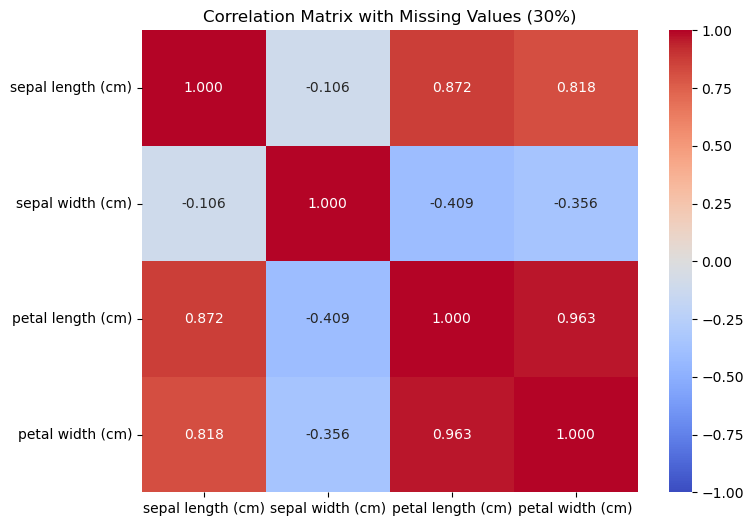

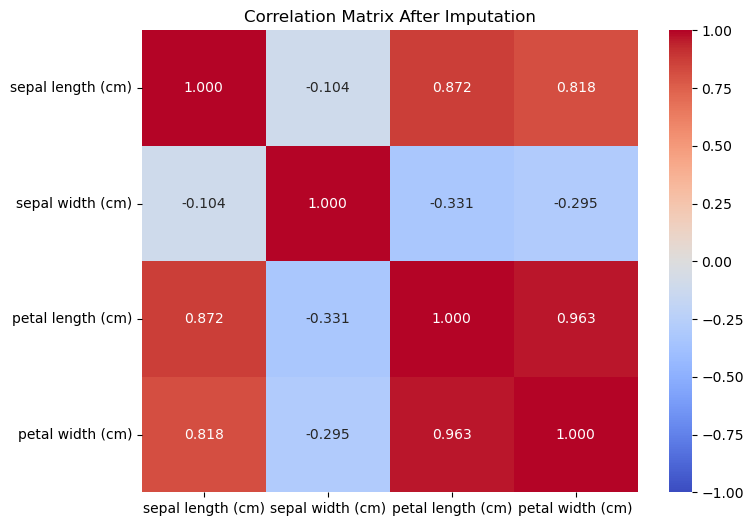

In [1]:
### ANSWER
#importing libraries for use in code
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#importing iris dataset
iris = datasets.load_iris()
#creates a panda data frame using the iris data. The columns are the feature names and corresponding data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
#functions below make seaborn heatmaps of the correlation matrix of the four numeric input features, sepal length and width, and petal length and width
#this is the function called below to make the correlation heatmap of the full dataset
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
     #correlation coeff go from -1 to +1 (this code sets the min and max bar next to the matrix)--applies to all heatmapfunctions below
    #map motif set to 'coolwarm'--applies to all heatmapfunctions below
    #annot = True means the coefficients will be displayed in each cell of the heat map - fmt sets the coeff to 3 decimal places--applies to all heatmapfunctions below
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    plt.title(title)
    # plt.show()
#this function creates a seaborn heatmap of the correlation matrix (cm) with 30% of values missing AND the matrix after imputing for the missing values
def plot_heatmap_subplots(missing_data, imputed_data):
    #2 plots in one row,sets size
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#correlation heat map with 30% of values from the data set randomly removed 
   
    sns.heatmap(missing_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[0])
    axes[0].set_title("Correlation Matrix with Missing Values")
#correlation heat map with randomly removed values imputed 
    sns.heatmap(imputed_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[1])
    axes[1].set_title("Correlation Matrix After Imputation")

    plt.tight_layout()
    # plt.show()

# full dataset correlation heatmap
#calls function above for full iris dataframe correlation heat map
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
#this function introduces random instances of missing values, could have been done with any numerical column 
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3): #0.3 missing rate removes 30% of values
    #copies the fed data frame and masks a percentage of values set above unless a different percentage is specified 
    df_missing = dataframe.copy()
    #random.rand generates random numbers from a uniform distribution
    #df_missing.shape[0] defines the rows in the data frame 
    mask = np.random.rand(df_missing.shape[0]) < missing_rate #np.random.rand(df_missing.shape[0]) picks random numbers uniformly from 0 to 1 for
    #however many rows there are in the data column picked, then compares the rows to the rate set above, if the number is below 0.3, then this data
    #will be removed by the code line below ~leading to approx 30% of rows removed
    df_missing.loc[mask, column] = np.nan
    return df_missing
#calls function just above and indicates sepal width is the chosen column for random missing values
df_missing = introduce_missingness_in_column(df, 'sepal width (cm)', missing_rate=0.3)

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)")

# mean and variance of remaining values in 'sepal width'
#finds mean and std dev using the dataframe with the missing values 
#df_missing refers to line above where introduce_missingness_in_column function was called
mean_val = df_missing['sepal width (cm)'].mean()
std_val = df_missing['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['sepal width (cm)'].isna()#finds indices where there is missing data
df_imputed = df_missing.copy() # copies data frame with 30% missing values generated above 
df_imputed.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val #in the new dataframe with the copied
#missing values dataset, .loc uses the indices from 'missing_indices' variable above. At these indices the imputed data point is calculated by 
#generating a random number from a standard normal distribution scaled and shifted to match the columns standard deviation and mean
#np.random.randn(missing_indices.sum()) defines how many random values will be generated where n = missing_indices.sum()

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation")


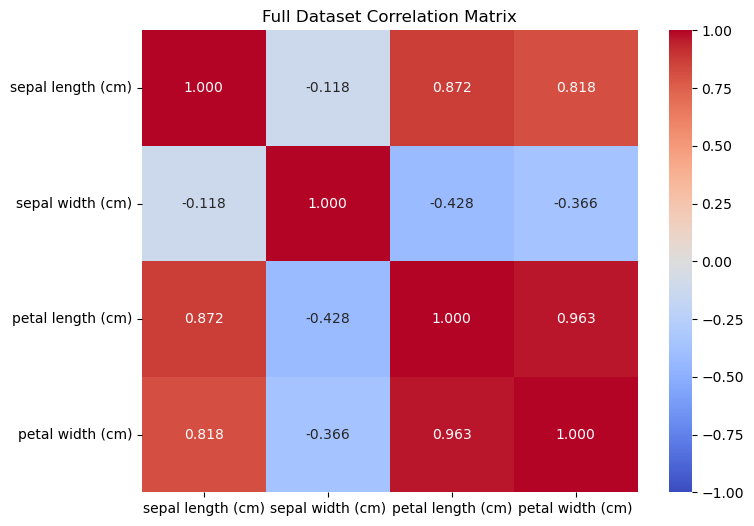

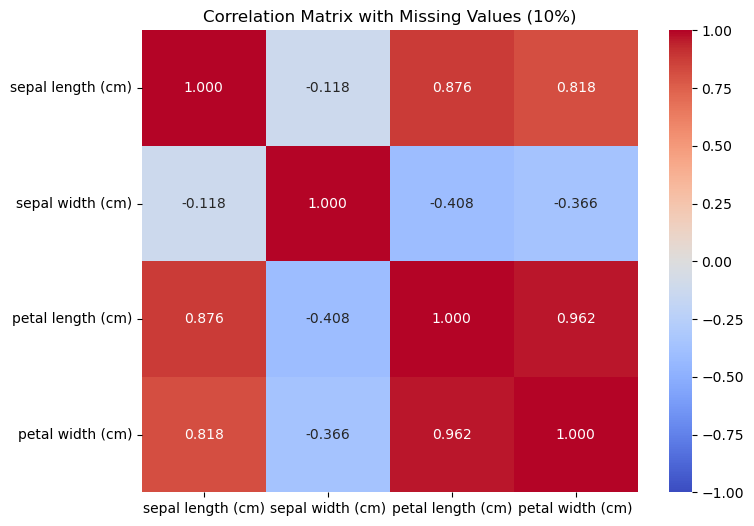

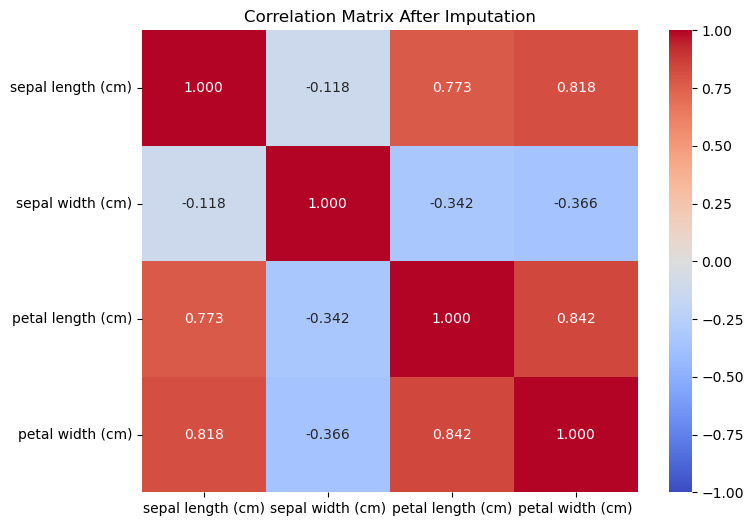

In [2]:
# changing missing column to petal width and missingness to 10%
#importing iris dataset
iris = datasets.load_iris()
#creates a panda data frame using the iris data. The columns are the feature names and corresponding data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
#functions below make seaborn heatmaps of the correlation matrix of the four numeric input features, sepal length and width, and petal length and width
#this is the function called below to make the correlation heatmap of the full dataset
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
     #correlation coeff go from -1 to +1 (this code sets the min and max bar next to the matrix)--applies to all heatmapfunctions below
    #map motif set to 'coolwarm'--applies to all heatmapfunctions below
    #annot = True means the coefficients will be displayed in each cell of the heat map - fmt sets the coeff to 3 decimal places--applies to all heatmapfunctions below
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    plt.title(title)
    # plt.show()
#this function creates a seaborn heatmap of the correlation matrix (cm) with 30% of values missing AND the matrix after imputing for the missing values
def plot_heatmap_subplots(missing_data, imputed_data):
    #2 plots in one row,sets size
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
#correlation heat map with 10% of values from the data set randomly removed 
   
    sns.heatmap(missing_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[0])
    axes[0].set_title("Correlation Matrix with Missing Values")
#correlation heat map with randomly removed values imputed 
    sns.heatmap(imputed_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[1])
    axes[1].set_title("Correlation Matrix After Imputation")

    plt.tight_layout()
    # plt.show()

# full dataset correlation heatmap
#calls function above for full iris dataframe correlation heat map
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
#this function introduces random instances of missing values, could have been done with any numerical column 
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3): #0.3 missing rate removes 30% of values
    #copies the fed data frame and masks a percentage of values set above unless a different percentage is specified 
    df_missing = dataframe.copy()
    #random.rand generates random numbers from a uniform distribution
    #df_missing.shape[0] defines the rows in the data frame 
    mask = np.random.rand(df_missing.shape[0]) < missing_rate #np.random.rand(df_missing.shape[0]) picks random numbers uniformly from 0 to 1 for
    #however many rows there are in the data column picked, then compares the rows to the rate set above, if the number is below 0.3, then this data
    #will be removed by the code line below ~leading to approx 30% of rows removed
    df_missing.loc[mask, column] = np.nan
    return df_missing
#calls function just above and indicates sepal width is the chosen column for random missing values
df_missing = introduce_missingness_in_column(df, 'petal length (cm)', missing_rate=0.1)

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (10%)")

# mean and variance of remaining values in 'sepal width'
#finds mean and std dev using the dataframe with the missing values 
#df_missing refers to line above where introduce_missingness_in_column function was called
mean_val = df_missing['petal length (cm)'].mean()
std_val = df_missing['petal length (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['petal length (cm)'].isna()#finds indices where there is missing data
df_imputed = df_missing.copy() # copies data frame with 30% missing values generated above 
df_imputed.loc[missing_indices, 'petal length (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val #in the new dataframe with the copied
#missing values dataset, .loc uses the indices from 'missing_indices' variable above. At these indices the imputed data point is calculated by 
#generating a random number from a standard normal distribution scaled and shifted to match the columns standard deviation and mean
#np.random.randn(missing_indices.sum()) defines how many random values will be generated where n = missing_indices.sum()

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation")

✏️ **Answer:**

1. The more missingness, the less the missing data and imputed correlation coefficients (CC) match the non-missing cc
2. As the data is imputed, the cc's begin to converge to the non-missing cc's
3. The missing values do not change the correlation all that much

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

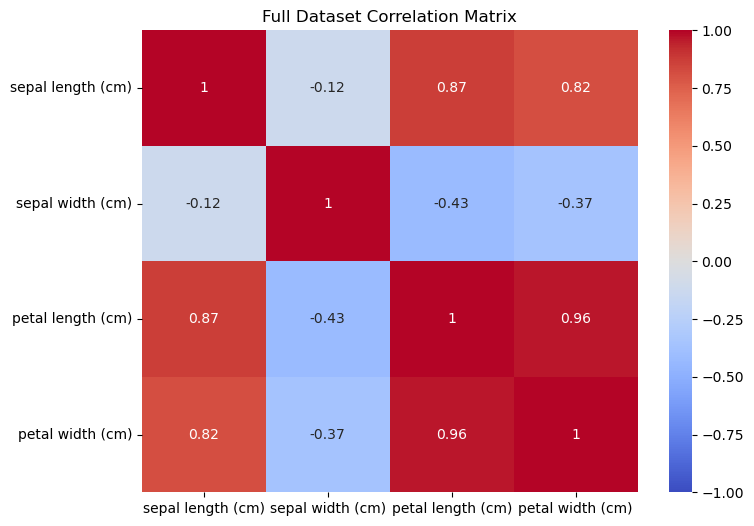

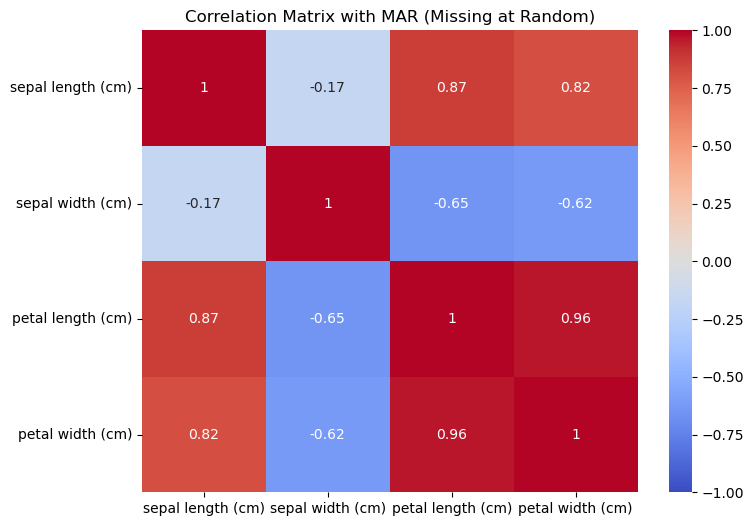

percent of missing values in column: 0.42


In [3]:
### ANSWER
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
#loading the same data as MCAR analysis above
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#the heatmap function for all the values (no missingness) is similar to the one used above, I won't recomment this one
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(df, "Full Dataset Correlation Matrix")

# MAR: Make 'sepal width' missing based on 'petal length'
#function variables include the column to remove values from, the reference column that will be compared to a threshold to determine whether or not data 
#in the corresponding row of the other column will be removed
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5) #sets threshold length of petal length, above which the 
#corresponding row in sepal width will be removed

# heatmap with MAR
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)")

#I don't know how many values in 'petal length' are above 4.5 which will affect how many values are removed.
n_missing = df_mar.isna().sum() #how many values are missing from each column
perc_missing = n_missing.loc['sepal width (cm)']/len(df['sepal width (cm)']) #grabs sepal width missing values number and divides it by total number of
#rows in a complete column
print('percent of missing values in column:', perc_missing) #displays percent


✏️ **Answer:** 

The missing values impact the calculation of coefficients more than the MCAR test did. This is probably because we're removing values in one column in relation to another. Petal width and sepal length cc's remain the same because these columns were not modified or used to determine value removal.  Here, the probability isn't dependent on the non-observed value - sepal width, it's dependent on an observed value - petal length. Additionally, 42% of the values are missing. I would expect this would significantly impact the cc's. If the threshold were to be lowered the values would converge to the non-missing data cc's.

**Similar to the example given in class: survey about income - younger people are less likely to respond to questions about their income. Missing values are based on age (observed value)...not their income (missing value)**

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


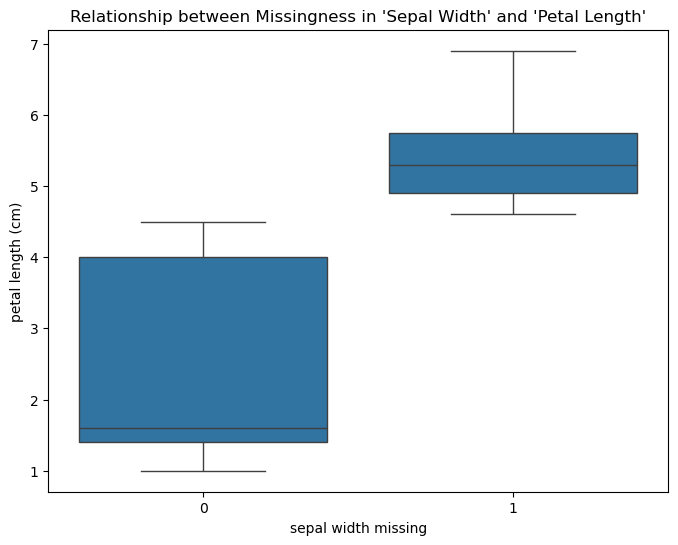

In [4]:
### ANSWER
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets #where dataset 'iris' originates
from scipy.stats import pearsonr #library we will use to calculate pearson correlation coefficients

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #numerical data from iris data set

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
#introduces the same MAR pattern as the code above using a threshold in the 'reference column' above which values in 
#the corresponding 'column_to_remove' row will be removed. Threshold is not predefined, must be set by the user
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold): 
    #copies complete data data frame
    df_mar = dataframe.copy()
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold# sets the indices for the mask used below
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan#replaces values with nan
    return df_mar #returns dataframe with synthetically removed values 

# Set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5) #threshold is again 4.5, so about 40% of the values will be missing
#as we saw above. Lower this to lower the percent missing

# 2. Add an indicator column for missingness in 'sepal width'
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)

# 3. Check for correlation between 'sepal width missing' and 'petal length'
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])#here we are checking if there is a correlation between 
#the missing values and an observed value. Normally we would not necessarily know what observed value column that would be

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
#prints P-value to see if this is actually significant 
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

✏️ **Answer:** There is a high correlation in values missing with petal length (obviously because we engineered it to be that way) and therefore the probability that the observed correlation would occur by chance is close to zero. The values in the bar chart at 0 (where there are no missing values) are below threshold of petal length 4.5 (max bar). Values at 1 (where values are missing) are above the 4.5 threshold (min bar).  

---
## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)
Your project is due at midnight, **October 19.**

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
2. what are the datasets you plan to use?
3. describe the data: will you need to use, for example, encoding of any kind? 
4. what is your IDA strategy? 
5. list the detailed steps of your EDA strategy
6. are there imbalances in your dataset? how will you handle this? 
7. give a detailed account of your visualization plan, including why you made the choices you did 
8. all of this will end up in a Streamlit app: describe your planned layout and logic behind it




✏️ **Answer:** 
**1. clearly articulate the goal of your project:** The goal of my project is to try and model microNIR data for wastewater treatment to total suspended solids to create a model that predicts water quality using microNIR.
**what are the datasets you plan to use?**
Dataset collected for a supplementary paper I am working on. This includes wavelength readings of wastewater between 700-2500 nm and the corresponding sample TS, TSS, and turbidity (NTU) values.
**describe the data: will you need to use, for example, encoding of any kind?**
The spectroscopy data is a range of 2 decimal place floats from 700-2500 nm. The data I am comparing to these absorbances are single measurements for turbidity, total solids (TS) and total suspended solids (TSS)
**what is your IDA strategy?**
Collection: data set comes from data I collected 8/2025. 
Quality and Integrity: 100 data points collected with calibrated data. TS were low in effluent samples and could lead to a greater margin of error. Data is mostly floats, with sample names as the only non-numerical value. No missing data. I'm not sure this data will be enough to determine a correlation. This is the inherent limitation in the data. There are only 100 data points from a very specific type of wastewater treatment. So this model would probably not be applicable to other wastewater treatment effluents, meaning a niche application. 

**list the detailed steps of your EDA strategy**
I will be looking at bivariate analysis, comparing TS, TSS, and turbidity with NIR spectroscopy data.I need to find a way to compare all the wavelengths from 700-2500 to one value (either total solids, total suspended solids, and turbidity) to try and find correlations if they exist. And if they do, how do I narrow down the range of wavelengths in which there is a correlation. 

**are there imbalances in your dataset? how will you handle this?**
There is an imbalance in concentrated wastewater feed. Only 16 values exist for this sample type because only two feed streams were used to feed 4 sets of reactors. This may lead to poor sensitivity and poor generalization of the blackwater feed in comparison with the effluent (which are approximately 84 samples out of the 100 sample data set). I could potentially sample less from the effluent class, or use cost-sensitive learning to focus more on the blackwater samples. I could potentially use SMOTE (synthetic minority oversampling technique) or a combination of these. 

**give a detailed account of your visualization plan, including why you made the choices you did**
For the single point parameters I will visualize mean, standard deviation, maximum and minimums. The distribution of the data is also important, and may be important for the spectroscopy data as well. I will establish the correlation between these parameters to start and then move to the NIR data. I will use common statistical functions and analytical plots (like boxplots). I will also have to decide which is best for my work, things like choosing between mean, median, and mode. 

**all of this will end up in a Streamlit app: describe your planned layout and logic behind it**
I'm not sure what the layout of the app would be. I imagine you upload your data set, it separates blackwater feed from treated water samples. Allows you to input either the spectral data and provides a potential total solids or total suspended solids count.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.